In [1]:
import matplotlib.pyplot as plt
import numpy as np

x=[1.,1.]
eps = 1.e-8
dx=1.e-6
nmax=100
deriv = [[0 for i in range(2)] for j in range(2)]
f = [0 for i in range(2)]

def F(x,f):
    f[0]=x[0]*x[0]+x[0]*x[1]-10.
    f[1]=x[1]+3.*x[0]*x[1]*x[1]-57.

def dFi_dXj(x, deriv):                           # Derivatives
    h = 1e-4                                             
    for j in range(2):
         temp = x[j]
         x[j] = x[j] +  h/2.
         F(x, f)                                                 
         for i in range(2):  
             deriv[i][j] = f[i] 
         x[j] = temp
    for j in range(2):
         temp = x[j]
         x[j] = x[j] - h/2.
         F(x, f)
         for i in range(2): 
             deriv[i][j] = (deriv[i][j] - f[i])/h
         x[j] = temp
        
def newtonraphson(x0,dx, Nmax, eps):
    for i in range(0,Nmax):
        F(x0,f)
        dFi_dXj(x0,deriv)
        dxf = np.dot(np.linalg.inv(deriv),np.transpose(f))
        x0 = x0 - dxf
        F(x0,f)
        if(abs(f[0])<eps) and (abs(f[1])<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f))
            break
    return x0

root = newtonraphson(x,dx,nmax,eps)
print(root)

[2.      3.00005]


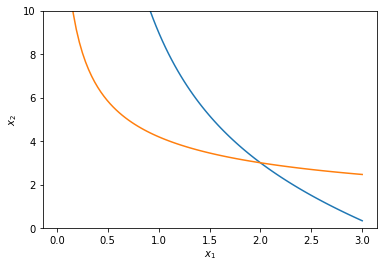

In [2]:
def f1(x):
    return (10.-x*x)/x

def f2(x):
    return (-1+np.sqrt(1.+4.*3.*x*57))/6./x

x=np.linspace(0.01,3,100)
plt.plot(x,f1(x))
plt.plot(x,f2(x))
plt.ylim(0,10)
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.show()